In [1]:

import numpy
from matplotlib import pyplot
%matplotlib inline



In [2]:


from matplotlib import animation
from IPython.display import HTML
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

In [3]:
import math
import numpy 
from matplotlib import pyplot
%matplotlib inline


In [4]:
m = 1.0
g = 9.81
L = 1.0


theta1_0 = numpy.pi/2
theta2_0 = numpy.pi/2
p1_0 = 0.0
p2_0 = 0.0

In [5]:
def rhs_double_pendule (u, m, L, dt):
    
    theta1, theta2, p1, p2 = u
    
    k1th1 = (6/(m*(L**2))) * ((2 * p1 - 3 * math.cos(theta1 - theta2) * p2)/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k1th2 = (6/(m*(L**2))) * ((8 * p2 - 3 * math.cos(theta1 - theta2) * p1)/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k1p1 = -(1/2) * m*(L**2)*(k1th1 * k1th2 * math.sin(theta1 - theta2) + 3 * (g/L) * math.sin(theta1))
    k1p2 = -(1/2) * m*(L**2)*(-k1th1 * k1th2 * math.sin(theta1 - theta2) +  (g/L) * math.sin(theta2))
    k2th1 = (6/(m*(L**2))) * ((2 * (p1 + (dt/2)*k1p1) - 3 * math.cos((theta1 + (dt/2)*k1th1) - (theta2 + (dt/2)*k1th2 )) * (p2 + (dt/2)*k1p2))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k2th2 = (6/(m*(L**2))) * ((8 * (p2 + (dt/2)*k1p2) - 3 * math.cos((theta1 + (dt/2)*k1th1 ) - (theta2 +(dt/2)*k1th2 )) * (p1 + (dt/2)*k1p1))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k2p1 = -(1/2) * m*(L**2)*(k2th1 * k2th2* math.sin((theta1 +(dt/2)*k1th1 ) - (theta2 + (dt/2)*k1th2)) + 3 * (g/L) * math.sin(theta1))
    k2p2 = -(1/2) * m*(L**2)*(-k2th1 * k2th2 * math.sin((theta1 +(dt/2)*k1th1 ) - (theta2 + (dt/2)*k1th2)) +  (g/L) * math.sin(theta2))
    k3th1 = (6/(m*(L**2))) * ((2 * (p1 + (dt/2)*k2p1) - 3 * math.cos((theta1 + (dt/2)*k2th1 ) - (theta2 + (dt/2)*k2th2)) * (p2 + (dt/2)*k2p2))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k3th2 = (6/(m*(L**2))) * ((8 * (p2 + (dt/2)*k2p2 ) - 3 * math.cos((theta1 + (dt/2)*k2th1) - (theta2 + (dt/2)*k2th2)) * (p1 + (dt/2)*k2p1))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k3p1 =  -(1/2) * m*(L**2)*(k3th1 * k3th2 * math.sin((theta1 + (dt/2)*k2th1) - (theta2 + (dt/2)*k2th2)) + 3 * (g/L) * math.sin(theta1))
    k3p2 = -(1/2) * m*(L**2)*(-k3th1 * k3th2 * math.sin((theta1 + (dt/2)*k2th1) - (theta2 + (dt/2)*k2th2)) +  (g/L) * math.sin(theta2))
    k4th1 = (6/(m*(L**2))) * ((2 * (p1 + dt * k3p1) - 3 * math.cos((theta1 + dt*k3th1) - (theta2 + dt * k3th2)) * (p2 + dt * k3p2))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k4th2 = (6/(m*(L**2))) * ((8 * (p2 + dt * k3p2) - 3 * math.cos((theta1 + dt * k3th1) - (theta2 + dt * k3th2)) * (p1 + dt * k3p1))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k4p1 = -(1/2) * m*(L**2)*(k4th1 * k4th2 * math.sin((theta1 + dt * k3th1) - (theta2 + dt * k3th2)) + 3 * (g/L) * math.sin(theta1))
    k4p2 = -(1/2) * m*(L**2)*(-k4th1 * k4th2 * math.sin((theta1 + dt * k3th1) - (theta2 + dt * k3th2)) +  (g/L) * math.sin(theta2))
    
    rhs = numpy.array([ k1th1 + 2 * k2th1 + 2* k3th1 + k4th1  ,k1th2 + 2 * k2th2 + 2* k3th2 + k4th2   ,k1p1 + 2 * k2p1 + 2* k3p1 + k4p1   , k1p2 + 2 * k2p2 + 2* k3p2 + k4p2 ])
    return rhs 

In [6]:
def step (f, u,dt, *args):
    u_new = u + (dt/6) * f(u,*args,dt)
    return u_new

In [7]:
T = 20.0
dt = 0.001
N = int(T/dt) + 1
u = numpy.empty((N,4))

u[0] = numpy.array([theta1_0, theta2_0, p1_0, p2_0 ])

for n in range (N-1):
    u[n + 1] = step (rhs_double_pendule,u[n],dt,m,L)
    
    

In [8]:
x1_values = numpy.empty(N)
x2_values = numpy.empty(N)
for n in range (N) :
    x1_values[n] = L * math.sin(u[n,0])
    x2_values[n] = x1_values[n] + L * math.sin(u[n,1])

In [9]:
y1_values = numpy.empty(N)
y2_values = numpy.empty(N)
for n in range (N) :
    y1_values[n] = -L * math.cos(u[n,0])
    y2_values[n] = y1_values[n] - L * math.cos(u[n,1])

In [10]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [11]:
b = numpy.zeros(N,dtype = float)

In [12]:
px1 = numpy.empty((N,2))
py1 = numpy.empty([N,2])
for n in range (N):
    px1[n,0] = 0.0
    px1[n,1] = x1_values[n]
for n in range (N):
    py1[n,0] = 0.0
    py1[n,1] = y1_values[n]


In [13]:
px2= numpy.empty((N,2))
py2 = numpy.empty([N,2])
for n in range (N):
    px2[n,1] = x2_values[n]
    px2[n,0] = x1_values[n]
for n in range (N):
    py2[n,1] = y2_values[n]
    py2[n,0] = y1_values[n]


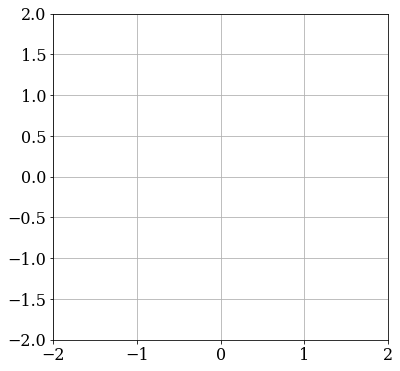

In [14]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (6.0,6.0))

ax = plt.axes( autoscale_on=True,xlim=(-2, 2), ylim=(-2, 2))
ax.grid()
line1, = ax.plot([], [])
line2, = ax.plot([], [])

In [15]:
def init():
    line1.set_data([], [])
    line2.set_data([],[])
    return line1,line2

# animation function.  This is called sequentially
def animate(i):
  
    line1.set_data(px1[i], py1[i])
    line2.set_data(px2[i],py2[i])
    return line1,line2


In [16]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=1, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [17]:


# Display the video.
HTML(anim.to_html5_video())

